In [19]:
import pandas as pd

# 데이터경로

data_path = './competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path +'test.csv')
submission = pd.read_csv(data_path +'sample_submission.csv')

In [20]:
sales_train.head()

# date 피처는 날짜를 의미

# date_block_num 피처는 편의상 상용하는 날짜(월) 구분자, 0은 2013년 2월, 1은 2013년 3월

# item_cnt_Day 피처는 당일 판매량을 나타낸다.

# 각 상점의 상품별 일일 판매량을 월별로 합친 값이 곧 각 상점의 상품별 월간 판매량이다.

# date_block_num 피처를 기준으로 그룹화해서 item_cnt_day 값을 합하면 타깃값이 된다.

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [21]:
sales_train.info(show_counts = True) # show_counts 는 비결측값 개수 표시

# 메모리 사용량이 134.4MB

# 제공한 데이터는 시계열 데이터이다.

# 시계열 데이터는 시간 흐름이 중요하다.

# 2013년 1월부터 2015년 9월까지 판매 내역을 훈련 데이터로 사용하고,

# 2015년 10월 판매 내역을 검증 데이터로 사용한다.

# 앞 장에서는 여러 폴드로 나눠 훈련 데이터와 검증 데이터를 지정했다.(oof 예측) 하지만 시계열 데이터는 이러면 과거와 미래가 섞이기 때문에 이용할 수 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [22]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [23]:
shops.info()

# 상점은 60개이고, null 값도 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [24]:
items.head()

# 상품명에서는 유용한 정보를 얻기 힘들어 모델링시 제거한다.

# item_id 피처는 sales_train 데이터에도 존재하는 피처이므로, item_id 피처를 기준으로 sales_train과 items를 병합할 수 있다.

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [25]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [26]:
item_categories.head()

# 상품분류명과 상품분류 ID로 구성돼 있다.
# sales_train에도 item_Category_id 피처가 보인다.

# 이 피처를 기준으로 sales_train과 item_categories를 병합할 수 있다.

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [27]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [28]:
test.head()

# 테스트 데이터 식별자인 ID, 상점 ID , 상점 ID로 구성돼 있다.

# 여기서 각 상점의 상품별 월간 판매량을 예측해야한다.

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## 데이터 병합

In [29]:
train = sales_train.merge(shops , on = 'shop_id' , how ='left')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум"""


In [30]:
train = train.merge(items , on = 'item_id' , how = 'left')
train = train.merge(item_categories , on = 'item_category_id' , how = 'left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


## 피처 요약표 만들기

In [33]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes , columns = ['데이터타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns= {'index' : '피처'})
    summary['결측값 개수'] = df.isnull().sum().values # 결측값의 개수 세기
    summary['고윳값 개수'] = df.nunique().values # 고윳값의 개수 ㅅ기
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values

    return summary

resumetable(train)

데이터셋 형상 : (2935849, 10)


,피처,데이터타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


## 데이터 시각화

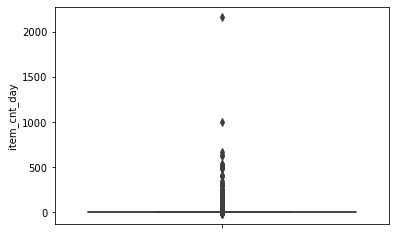

In [35]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day' , data = train)

# 이상치가 많아 모양이 납작해졌다. 과한 이상치는 제거해야 한다.

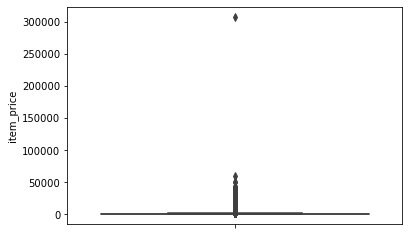

In [36]:
sns.boxplot(y = 'item_price' , data=train)

# 판매가에 대한 박스플롯도 납작하다.

#### 그룹화

In [42]:
# 그룹화는 회귀 문제에서 자주 쓰인다. groupby() 함수

group = train.groupby('date_block_num').agg({'item_cnt_day' : 'sum'})
# date_block_num 피처를 기준으로 그룹화해 item_cnt_day 피처의 합(sum)을 구하는 코드이다.
# 월별(date_block_num) 월간 판매량(item_cnt_day)의 합을 구한다는 말이다.
group.reset_index()


# groupby 원리

# 1. DataFrame에 있는 한 개 이상의 피처를 기준으로 데이터를 분리한다.

# 2. 분리된 각 그룹에 함수를 적용해 집계값을 구한다.(agg() 메서드로 item_cnt_day 피처에 'sum'함수를 적용해 판매량 합계를 구한다.

# 3. 기준 피처별로 집계값 결과를 하나로 결합한다.

# sum , mean ,median ,std ,var , count , min , max

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0, 0.5, 'Monthly item counts'),
 Text(0.5, 0, 'Date block number'),
 Text(0.5, 1.0, 'Distribution of monthly item counts by date block number')]

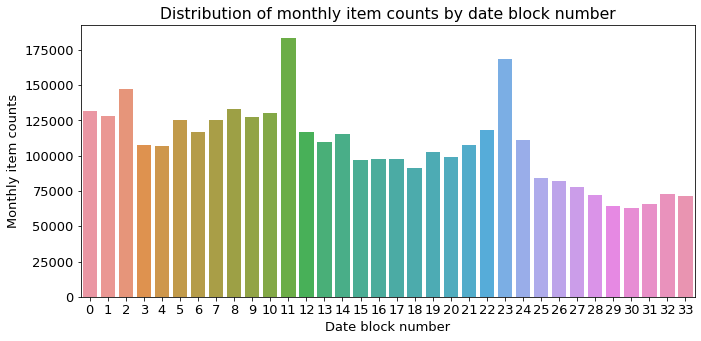

In [43]:
mpl.rc('font' , size = 13)
figure , ax = plt.subplots()
figure.set_size_inches(11,5)

# 월별 총 상품 판매량

group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day' : 'sum'})
group_month_sum = group_month_sum.reset_index()

# 월별 총 상품 판매량 막대 그래프

sns.barplot(x = 'date_block_num' , y ='item_cnt_day' , data = group_month_sum)

# 그래프 제목 , x축 라벨, y축 라벨명 설정
ax.set(title = 'Distribution of monthly item counts by date block number' ,
       xlabel = 'Date block number' ,
       ylabel = 'Monthly item counts')

#### 상품분류별 판매량

In [44]:
train['item_category_id'].nunique() # 상품분류의 개수는 84개이다.

84

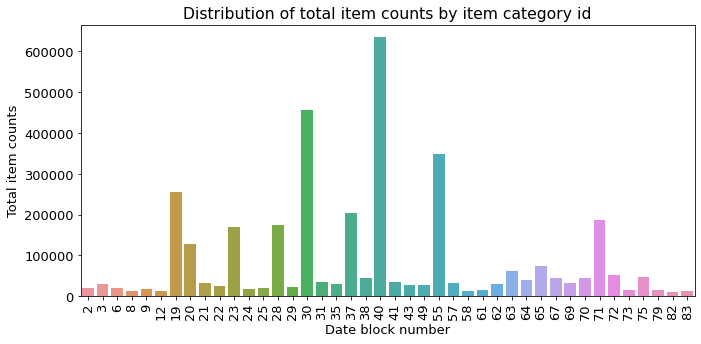

In [46]:
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

# 상품분류별 총 상품 판매량

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day' : 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 월간 판매량이 10,000개를 초과하는 상품분류만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

# 상품분류별 총 상품 판매량 막대 그래프
sns.barplot(x = 'item_category_id' , y = 'itelm_cnt_day' , data = group_cat_sum)
ax.set(title = 'Distribution of total item counts by item category id' ,
       xlabel = 'Date block number',
       ylabel = 'Total item counts')
ax.tick_params(axis = 'x' , labelrotation = 90) # x축 라벨 회전

#### 상점별 판매량

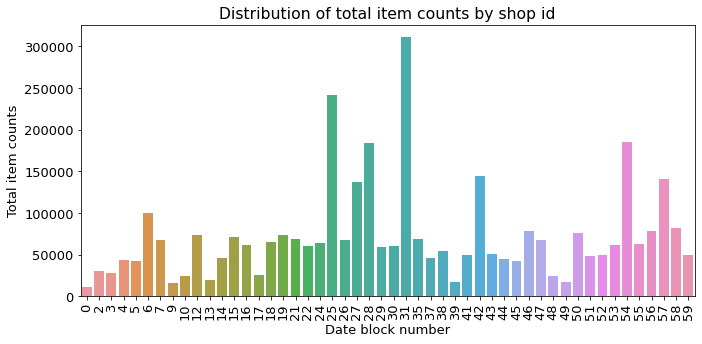

In [50]:
figure , ax = plt.subplots()
figure.set_size_inches(11,5)

# 상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day' : 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

# 상점별 총 상품 판매량 막대 그래프
sns.barplot(x = 'shop_id' , y= 'item_cnt_day' , data = group_shop_sum)
ax.set(title = 'Distribution of total item counts by shop id',
       xlabel = 'Date block number',
       ylabel = 'Total item counts')
ax.tick_params(axis = 'x' , labelrotation =90)